In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
# Carregar dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizar os dados (0 a 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Nomes das classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

C:\Users\pedro\AppData\Local\Temp\ipykernel_25428\2472413701.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


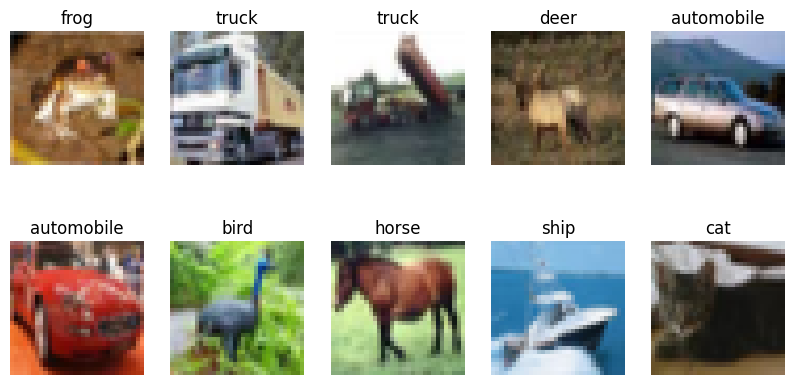

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes
])

c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.3464 - loss: 1.7701 - val_accuracy: 0.5735 - val_loss: 1.1818
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5994 - loss: 1.1352 - val_accuracy: 0.6434 - val_loss: 1.0067
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6649 - loss: 0.9523 - val_accuracy: 0.6676 - val_loss: 0.9470
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6988 - loss: 0.8570 - val_accuracy: 0.6947 - val_loss: 0.8831
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7278 - loss: 0.7823 - val_accuracy: 0.6760 - val_loss: 0.9465
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7493 - loss: 0.7166 - val_accuracy: 0.6956 - val_loss: 0.8768
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7709 - loss: 0.6571 - val_accuracy: 0.7146 - val_loss: 0.8495
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7815 - loss: 0.6182 -

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nAcurácia no teste: {test_acc:.2f}')

313/313 - 1s - 2ms/step - accuracy: 0.7031 - loss: 0.9124

Acurácia no teste: 0.70


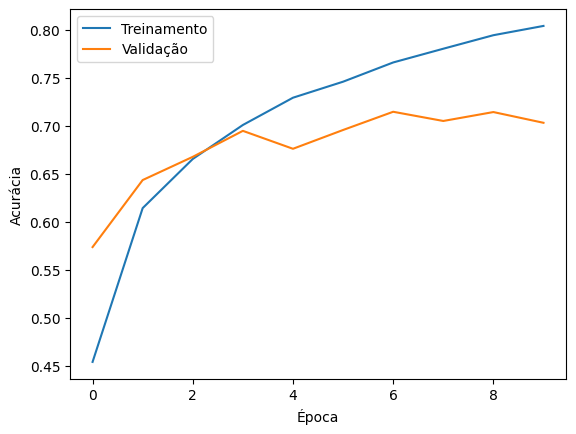

In [9]:
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


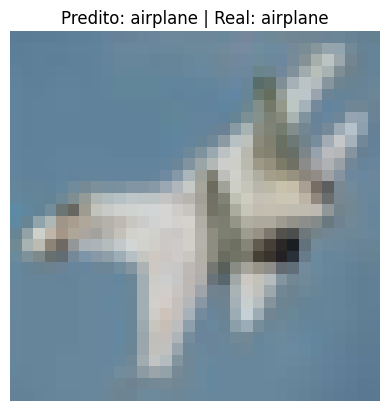

In [13]:
import numpy as np

probability_model = models.Sequential([
    model,
    layers.Softmax()
])

predictions = probability_model.predict(x_test)

# Mostrar uma previsão
i = 10
plt.imshow(x_test[i])
plt.title(f"Predito: {class_names[np.argmax(predictions[i])]} | Real: {class_names[y_test[i][0]]}")
plt.axis('off')
plt.show()

In [ ]:
# Carregar a imagem real
img_path = 'minha_imagem.jpg'  # nome da sua imagem
img = image.load_img(img_path, target_size=(32, 32))  # redimensiona para 32x32

# Converter para array e normalizar
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # adiciona dimensão de batch

# Fazer previsão
prediction = probability_model.predict(img_array)
predicted_class = np.argmax(prediction[0])

# Mostrar imagem e resultado
plt.imshow(img)
plt.title(f"Predição: {class_names[predicted_class]}")
plt.axis('off')
plt.show()